In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygtc

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


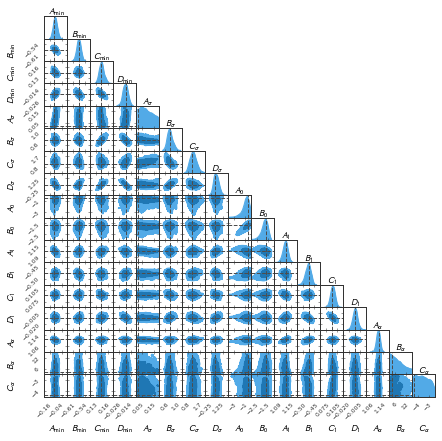

In [2]:
c=0  #cosmology number
ph=0 #phase number
path_chains = 'data/mcmc_chains/'
path_fits = 'data/best_fits/'

# read best-fitting values of the parameters
best_fit = np.loadtxt(path_fits+"AbacusSummit_base_c%03d_ph%03d_best_params.txt"%(c,ph))

# read the mcmc chains
params = np.load(path_chains+"best_params_chain_c%03d_ph%03d.npy"%(c,ph))
params = params[1000:,:,:,0] # discard first 1000 steps

# flatten array. Some of the parameters are in the wrong order, so rearrange them
ndim = 17
params_flat = params.reshape((-1, ndim))
params_flat_new = params_flat.copy()
params_flat_new[:,6] = params_flat[:,7]
params_flat_new[:,7] = params_flat[:,6]
params_flat_new[:,7] -= 20
params_flat_new[:,8] = params_flat[:,9]
params_flat_new[:,9] = params_flat[:,8]

paramNames = [r'$A_\mathrm{min}$',r'$B_\mathrm{min}$',r'$C_\mathrm{min}$',r'$D_\mathrm{min}$',
              r'$A_\sigma$',r'$B_\sigma$',r'$C_\sigma$',r'$D_\sigma$',
              r'$A_0$',r'$B_0$', r'$A_1$',r'$B_1$',r'$C_1$',r'$D_1$', r'$A_\alpha$',r'$B_\alpha$',r'$C_\alpha$']


tickRanges = [[-0.16,-0.04],[-0.61,-0.54],[0.13,0.16],[-0.026,-0.014],
                [0.05,0.15],[0.6,1.],[0.8,1.7],[-0.25, 1.25],
                [-3,-1],[-2.5,-1.5],
                [1.09,1.15],[-0.5,-0.45],[0.075,0.105],[-0.02, -0.005],
                [1.06,1.14],[6,12],[-4,-3]]

paramRanges = []
for i in range(len(tickRanges)):
    delta = abs(tickRanges[i][0] - np.mean(tickRanges[i]))
    paramRanges.append([tickRanges[i][0] - delta, tickRanges[i][1] + delta])

fig = pygtc.plotGTC(chains=params_flat_new, paramNames=paramNames, truths=best_fit, paramRanges=paramRanges,
                  labelRotation=[True,True], tickShifts=[0.4,0.4], figureSize='MNRAS_page')


# adjust the x and y ticks
# loops along each row, starting in top left
idx = 0
for j in range(17):
    for i in range(j):
        fig.axes[idx].tick_params(axis='both', which='both', length=2)
        a=fig.axes[idx].set_xticks(tickRanges[i])
        a=fig.axes[idx].set_yticks(tickRanges[j])
        idx += 1
        
# add labels to histograms
for i in range(136,136+17):
    fig.axes[i].set_title(paramNames[i-136], fontsize=9, y=1.0, pad=2)
    fig.axes[i].tick_params(axis='both', which='both', length=2)
    a=fig.axes[i].set_xticks(tickRanges[i-136])
    
    
# save the figure as a pdf
plt.savefig('pdf/Figure_4.pdf', dpi=300, bbox_inches='tight')